In [1]:
import json
import pandas as pd


In [2]:
# Load the JSON data
with open("./data/produse_in_urls.json", 'r') as file:
    train_data = json.load(file)

#  empty list to store URLs and their products
data = []

for item in train_data:
    # Extract URL and products
    url = item['url']
    products = item['products']
    
    # Append the URL and unique products to the list
    data.append({'url': url, 'products': list(set(products))})

# Create a DataFrame from the list
df_train = pd.DataFrame(data)

# Print the DataFrame
print(df_train)

                                                  url   
0   https://www.factorybuys.com.au/products/euro-t...  \
1   https://www.knoll.com/design-plan/products/by-...   
2   https://furniturefetish.com.au/products/oslo-o...   
3   https://www.hudsonfurniture.com.au/products/st...   
4            https://dhfonline.com/products/gift-card   
..                                                ...   
90                   https://www.bellus.com/products/   
91  https://shop.vanillawood.com/products/plume-wa...   
92          https://oakforless.com/products/gift-card   
93                       http://oot-oot.com/products/   
94                  http://modliving.com.ph/products/   

                                             products  
0   [mattress, furnishings, mattresses, beds, matt...  
1   [bench, sofa, furnishings, lounge chair, table...  
2                                                  []  
3                                      [bench, stool]  
4   [furnishings, chandelier, gift 

In [3]:
import json
import pandas as pd

with open("./data/final_predictions.json", 'r') as file:
    test_data = json.load(file)

data = []

for item in test_data:
    url = item['url']
    products = item['predictions']
    
    data.append({'url': url, 'products': list(set(products))})

df_preds = pd.DataFrame(data)




In [4]:
df = pd.concat([df_train, df_preds], ignore_index=True)
print(df)

                                                   url   
0    https://www.factorybuys.com.au/products/euro-t...  \
1    https://www.knoll.com/design-plan/products/by-...   
2    https://furniturefetish.com.au/products/oslo-o...   
3    https://www.hudsonfurniture.com.au/products/st...   
4             https://dhfonline.com/products/gift-card   
..                                                 ...   
292  https://thebeachfurniture.com.au/products/gift...   
293  http://aonefurniture.in/userdata/products/no%2...   
294                    https://gfurniture.ca/products/   
295  https://signaturefinefurniture.ca/products/jac...   
296  https://thefurniture-house.co.uk/products/new-...   

                                              products  
0    [mattress, furnishings, mattresses, beds, matt...  
1    [bench, sofa, furnishings, lounge chair, table...  
2                                                   []  
3                                       [bench, stool]  
4    [furnishings,

In [5]:
# df.to_csv('./data/full_list_products')

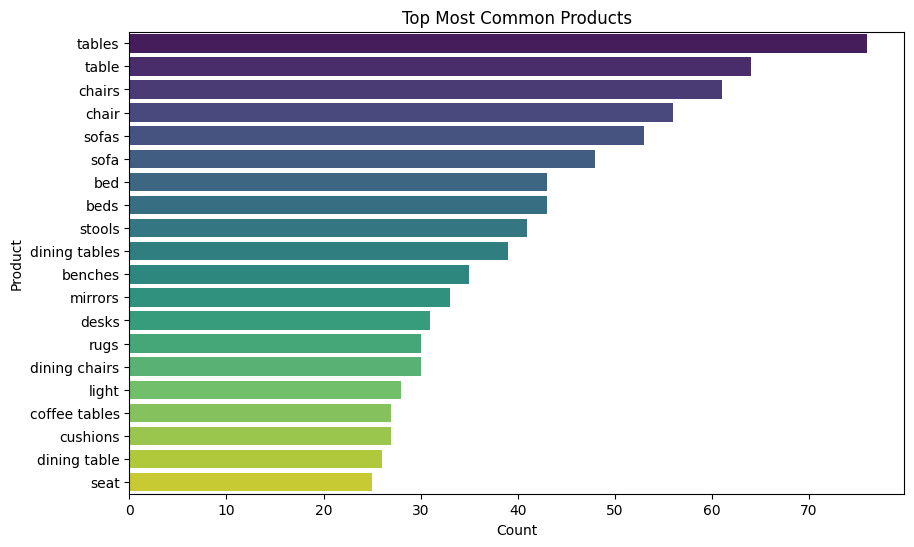

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create list with all products
all_products = []
for sublist in df['products']:
    for product in sublist:
        all_products.append(product)
        
        
# Count the occurrences of each product
product_counts = pd.Series(all_products).value_counts()

# Search top 20 products
top_products = product_counts.head(20)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Product')
plt.title('Top Most Common Products')
plt.show()


C:\Users\PesikaMau\AppData\Local\Temp\ipykernel_25764\287942613.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_links['short_url'] = top_10_links['url'].apply(extract_domain)


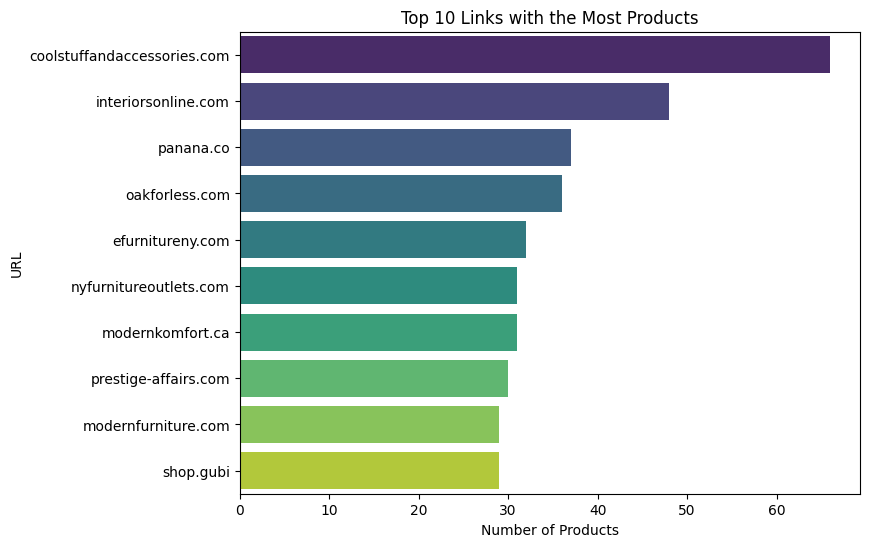

In [7]:
# Count the number of products for each URL
df['num_products'] = df['products'].apply(len)

# Sort the DataFrame based on the number of products in descending order
df_sorted_by_products = df.sort_values(by='num_products', ascending=False)

# Select the top 10 links with the most products
top_10_links = df_sorted_by_products.head(10)

import re

# Extract the domain name from the URL
def extract_domain(url):
    match = re.search(r"(?<=://)(?:www\.)?([\w-]+\.[a-zA-Z]+)", url)
    if match:
        return match.group(1)
    else:
        return url

# Shorten the URLs to only display www.url_name.com
top_10_links['short_url'] = top_10_links['url'].apply(extract_domain)

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=top_10_links['num_products'], y=top_10_links['short_url'], palette='viridis')
plt.xlabel('Number of Products')
plt.ylabel('URL')
plt.title('Top 10 Links with the Most Products')
plt.show()


In [8]:
# Print the top 10 links with their products
for index, row in top_10_links.iterrows():
    print(f"URL: {row['short_url']}")
    print(f"Products: {row['products']}")
    print()


URL: coolstuffandaccessories.com
Products: ['headboards', 'headphones', 'table', 'seats', 'cabinet', 'bookshelf', 'coffee tables', 'dining table', 'dining chair sofa', 'shelf', 'barstool', 'tables', 'bookcase', 'bench', 'office chair', 'ottomans', 'case', 'ottoman', 'sleeper', 'nightstands', 'islands', 'chandelier', 'desk', 'dressers table lamps', 'shelves', 'sofas', 'dining chair', 'book', 'bookcases', 'chests', 'futons', 'pillow', 'stools table', 'buffet', 'sectional sofa units', 'beds', 'chaise loungers', 'console', 'recliners', 'stools', 'chair', 'console table', 'love seat', 'bed', 'stool', 'benches', 'office chairs', 'buffets', 'arm', 'bar', 'dresser', 'cabinets', 'lounge chair', 'chest', 'mirror', 'coffee table', 'mirrors', 'sofa', 'deskphones', 'armchair stool', 'lounge', 'nightstand', 'patio chairs', 'desks', 'chaise', 'chairs']

URL: interiorsonline.com
Products: ['bedside tables', 'headboards', 'table', 'seats', 'gift cards', 'gift card', 'coffee tables', 'dining table', 'do